# A case study of  Food and Fertilizer statistics of India and world 

This projects is a case study of food and fertlizer production of Indian. The dataset has been taken from kaggle . The owner of this dataset is United Nations. Using this dataset I want to look into the trend of food production in India . I also want to look into the fertlizer production trend of India and world .

I will be using numpy , pandas , matplotlib and seaborn libraries in this project . I will be preparing and cleaning dataset . Then I will be exploring dataset to understand it. I will be using all techniques i.e Analyzing Tabular Data with Pandas and Visualization with Matplotlib and Seaborn etc. that I have learnt in [the course](http://zerotopandas.com)

As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [1]:
project_name = "zerotopandas-course-project-starter-satyam" # change this

In [2]:
!pip install jovian --upgrade -q
!pip install pandas 
!pip install numpy

In [3]:
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Updating notebook "mrzombie69232/zerotopandas-course-project-starter-satyam" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/mrzombie69232/zerotopandas-course-project-starter-satyam


'https://jovian.ml/mrzombie69232/zerotopandas-course-project-starter-satyam'

## Data Preparation and Cleaning

Uisng the pandas dataframe we are preparing dataset i.e. loading and cleaning the dataset. Here , I have used two data sets from kaggle:- 1)Crops Data 2) Fertilizer Data.

In [42]:
crop_df = pd.read_csv('fao_data_crops_data.csv')
crop_df.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,31,Area Harvested,2007.0,Ha,49404.0,A,agave_fibres_nes
1,Americas +,31,Area Harvested,2006.0,Ha,49404.0,A,agave_fibres_nes
2,Americas +,31,Area Harvested,2005.0,Ha,49404.0,A,agave_fibres_nes
3,Americas +,31,Area Harvested,2004.0,Ha,49113.0,A,agave_fibres_nes
4,Americas +,31,Area Harvested,2003.0,Ha,48559.0,A,agave_fibres_nes


In [43]:
#check for missing valuesm in each column 
missing_values_count = crop_df.isnull().sum()
missing_values_count

country_or_area         0
element_code            0
element               964
year                  964
unit                  964
value                 964
value_footnotes    479382
category                0
dtype: int64

In [44]:
#getting data for India 
India_data = crop_df[crop_df['country_or_area'] == 'India']
India_data.head(150)

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
14986,India,31,Area Harvested,2007.0,Ha,300000.0,F,anise_badian_fennel_corian
14987,India,31,Area Harvested,2006.0,Ha,300000.0,F,anise_badian_fennel_corian
14988,India,31,Area Harvested,2005.0,Ha,300000.0,F,anise_badian_fennel_corian
14989,India,31,Area Harvested,2004.0,Ha,300000.0,F,anise_badian_fennel_corian
14990,India,31,Area Harvested,2003.0,Ha,300000.0,F,anise_badian_fennel_corian
...,...,...,...,...,...,...,...,...
26157,India,31,Area Harvested,2003.0,Ha,250000.0,NaN,apples
26158,India,31,Area Harvested,2002.0,Ha,240000.0,NaN,apples
26159,India,31,Area Harvested,2001.0,Ha,240000.0,NaN,apples
26160,India,31,Area Harvested,2000.0,Ha,230000.0,NaN,apples


In [33]:
#converting hg to tonnes
India_data.loc[India_data['unit'] !='tonnes', 'value'] = India_data['value']/10000
India_data.head(150)

/srv/conda/envs/notebook/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,country_or_area,element_code,element,year,unit,value,value_footnotes,category
14986,India,31,Area Harvested,2007.0,Ha,0.00300,F,anise_badian_fennel_corian
14987,India,31,Area Harvested,2006.0,Ha,0.00300,F,anise_badian_fennel_corian
14988,India,31,Area Harvested,2005.0,Ha,0.00300,F,anise_badian_fennel_corian
14989,India,31,Area Harvested,2004.0,Ha,0.00300,F,anise_badian_fennel_corian
14990,India,31,Area Harvested,2003.0,Ha,0.00300,F,anise_badian_fennel_corian
...,...,...,...,...,...,...,...,...
26157,India,31,Area Harvested,2003.0,Ha,0.00250,NaN,apples
26158,India,31,Area Harvested,2002.0,Ha,0.00240,NaN,apples
26159,India,31,Area Harvested,2001.0,Ha,0.00240,NaN,apples
26160,India,31,Area Harvested,2000.0,Ha,0.00230,NaN,apples


In [45]:
#checing missing values for Indian data 
missing_val_coun_ind = India_data.isnull().sum()
missing_val_coun_ind

country_or_area       0
element_code          0
element               0
year                  0
unit                  0
value                 0
value_footnotes    5434
category              0
dtype: int64

In [46]:
#removing unwanted columns
del India_data['element_code']
del India_data['value_footnotes']
India_data.head()

,country_or_area,element,year,unit,value,category
14986,India,Area Harvested,2007.0,Ha,300000.0,anise_badian_fennel_corian
14987,India,Area Harvested,2006.0,Ha,300000.0,anise_badian_fennel_corian
14988,India,Area Harvested,2005.0,Ha,300000.0,anise_badian_fennel_corian
14989,India,Area Harvested,2004.0,Ha,300000.0,anise_badian_fennel_corian
14990,India,Area Harvested,2003.0,Ha,300000.0,anise_badian_fennel_corian


In [47]:
India_data.head(200)

,country_or_area,element,year,unit,value,category
14986,India,Area Harvested,2007.0,Ha,300000.0,anise_badian_fennel_corian
14987,India,Area Harvested,2006.0,Ha,300000.0,anise_badian_fennel_corian
14988,India,Area Harvested,2005.0,Ha,300000.0,anise_badian_fennel_corian
14989,India,Area Harvested,2004.0,Ha,300000.0,anise_badian_fennel_corian
14990,India,Area Harvested,2003.0,Ha,300000.0,anise_badian_fennel_corian
...,...,...,...,...,...,...
26207,India,Yield,2000.0,Hg/Ha,45652.0,apples
26208,India,Yield,1999.0,Hg/Ha,59740.0,apples
26209,India,Yield,1998.0,Hg/Ha,58002.0,apples
26210,India,Yield,1997.0,Hg/Ha,58751.0,apples


In [7]:
#loading fertlizer data and preparing data 
fertilizer_df = pd.read_csv('fao_data_fertilizers_data.csv')
fertilizer_df.head(10)

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,11,Stocks,2007.0,Head,3100.0,A,animals_live_nes
1,Americas +,11,Stocks,2006.0,Head,3100.0,A,animals_live_nes
2,Americas +,11,Stocks,2005.0,Head,3100.0,A,animals_live_nes
3,Americas +,11,Stocks,2004.0,Head,3100.0,A,animals_live_nes
4,Americas +,11,Stocks,2003.0,Head,3100.0,A,animals_live_nes
5,Americas +,11,Stocks,2002.0,Head,3100.0,A,animals_live_nes
6,Americas +,11,Stocks,2001.0,Head,2480.0,A,animals_live_nes
7,Americas +,11,Stocks,2000.0,Head,2000.0,A,animals_live_nes
8,Americas +,11,Stocks,1999.0,Head,0.0,A,animals_live_nes
9,Americas +,11,Stocks,1998.0,Head,0.0,A,animals_live_nes


In [8]:
#check for missing valuesm in each column 
missing_values_count_fer = fertilizer_df.isnull().sum()
missing_values_count_fer

country_or_area        0
element_code           0
element               80
year                  80
unit                  80
value                 80
value_footnotes    44622
category               0
dtype: int64

In [9]:
#getting unique values from elemets
fertilizer_df['year'].unique()

array([2007., 2006., 2005., 2004., 2003., 2002., 2001., 2000., 1999.,
       1998., 1997., 1996., 1995., 1994., 1993., 1992., 1991., 1990.,
       1989., 1988., 1987., 1986., 1985., 1984., 1983., 1982., 1981.,
       1980., 1979., 1978., 1977., 1976., 1975., 1974., 1973., 1972.,
       1971., 1970., 1969., 1968., 1967., 1966., 1965., 1964., 1963.,
       1962., 1961.,   nan])

In [10]:
#getting data for India 
India_fertilizer_data = fertilizer_df[fertilizer_df['country_or_area'] == 'India']
India_fertilizer_data.head(150)

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
3805,India,11,Stocks,2007.0,Head,650000.0,F,asses
3806,India,11,Stocks,2006.0,Head,650000.0,F,asses
3807,India,11,Stocks,2005.0,Head,650000.0,F,asses
3808,India,11,Stocks,2004.0,Head,650000.0,F,asses
3809,India,11,Stocks,2003.0,Head,650000.0,NaN,asses
...,...,...,...,...,...,...,...,...
25297,India,11,Stocks,2003.0,Head,185180000.0,NaN,cattle
25298,India,11,Stocks,2002.0,Head,187422000.0,NaN,cattle
25299,India,11,Stocks,2001.0,Head,189660000.0,NaN,cattle
25300,India,11,Stocks,2000.0,Head,191924000.0,NaN,cattle


In [11]:
#removing unwanted columns
del India_fertilizer_data['element_code']
del India_fertilizer_data['value_footnotes']
India_fertilizer_data.head()

,country_or_area,element,year,unit,value,category
3805,India,Stocks,2007.0,Head,650000.0,asses
3806,India,Stocks,2006.0,Head,650000.0,asses
3807,India,Stocks,2005.0,Head,650000.0,asses
3808,India,Stocks,2004.0,Head,650000.0,asses
3809,India,Stocks,2003.0,Head,650000.0,asses


In [12]:
#dropping nan values form the year 
India_fertilizer_data.dropna(subset = ["year"], inplace=False)
#checking for missing values 
missing_values_count_fer = India_fertilizer_data.isnull().sum()
missing_values_count_fer

country_or_area    0
element            0
year               0
unit               0
value              0
category           0
dtype: int64

In [13]:
import jovian

In [14]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mrzombie69232/zerotopandas-course-project-starter-satyam" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/mrzombie69232/zerotopandas-course-project-starter-satyam


'https://jovian.ml/mrzombie69232/zerotopandas-course-project-starter-satyam'

## Exploring and gathering the relevant information

Exploring your dataset is one of the very important step in order to indetify the important fields . Exctracting the required information from the dataset .

In [48]:
#get unique values from element
India_data['element'].unique()

array(['Area Harvested', 'Yield', 'Production Quantity', 'Seed',
       'Gross Production 1999-2001 (1000 I$)',
       'Net Production 1999-2001 (1000 I$)', 'Gross PIN (base 1999-2001)',
       'Grs per capita PIN (base 1999-2001)', 'Net PIN (base 1999-2001)',
       'Net per capita PIN (base 1999-2001)'], dtype=object)

In [49]:
#exploring values in year 
India_data['year'].unique()

array([2007., 2006., 2005., 2004., 2003., 2002., 2001., 2000., 1999.,
       1998., 1997., 1996., 1995., 1994., 1993., 1992., 1991., 1990.,
       1989., 1988., 1987., 1986., 1985., 1984., 1983., 1982., 1981.,
       1980., 1979., 1978., 1977., 1976., 1975., 1974., 1973., 1972.,
       1971., 1970., 1969., 1968., 1967., 1966., 1965., 1964., 1963.,
       1962., 1961.])

In [50]:
#get unique values from element
India_fertilizer_data['category'].unique()

array(['asses', 'buffaloes', 'camels', 'cattle', 'chickens', 'ducks',
       'goats', 'horses', 'mules', 'pigs', 'sheep'], dtype=object)

In [57]:
#exploring values in year 
India_data['category'].unique()

array(['anise_badian_fennel_corian', 'apples', 'apricots', 'arecanuts',
       'bananas', 'barley', 'beans_dry', 'beans_green', 'berries_nes',
       'cabbages_and_other_brassicas', 'carrots_and_turnips',
       'cashew_nuts_with_shell', 'cassava', 'castor_oil_seed',
       'cauliflowers_and_broccoli', 'cereals_rice_milled_eqv',
       'cereals_total', 'cherries', 'chick_peas',
       'chillies_and_peppers_dry', 'chillies_and_peppers_green',
       'citrus_fruit_nes', 'citrus_fruit_total', 'coarse_grain_total',
       'cocoa_beans', 'coconuts', 'coffee_green', 'coir',
       'cucumbers_and_gherkins', 'eggplants_aubergines',
       'fibre_crops_primary', 'figs', 'fruit_excl_melons_total',
       'fruit_fresh_nes', 'fruit_tropical_fresh_nes', 'garlic', 'ginger',
       'grapefruit_inc_pomelos', 'grapes', 'groundnuts_with_shell',
       'jute', 'jute_jute_like_fibres', 'lemons_and_limes', 'lentils',
       'lettuce_and_chicory', 'linseed', 'maize',
       'mangoes_mangosteens_guavas', 'mi

In [155]:
#India_data_new = India_data.groupby('country_or_area')[['element','year', 'value', 'category']]
#India_data_new.tail(100)

In [51]:
#getting values and year together 
India_year_value_df = India_data[['year','value']]
India_year_value_df

,year,value
14986,2007.0,300000.0
14987,2006.0,300000.0
14988,2005.0,300000.0
14989,2004.0,300000.0
14990,2003.0,300000.0
...,...,...
2222703,1965.0,12257000.0
2222704,1964.0,9853000.0
2222705,1963.0,10776000.0
2222706,1962.0,12072000.0


In [52]:
#grouping the production by year 
area_mean = India_year_value_df.groupby('year')['value'].mean()
area_mean.head()

year
1961.0    3.275520e+06
1962.0    3.293842e+06
1963.0    3.289719e+06
1964.0    3.381960e+06
1965.0    3.294874e+06
Name: value, dtype: float64

In [53]:
#getting values and category together 
India_value_category_df = India_data[['value','category']]
India_value_category_df

,value,category
14986,300000.0,anise_badian_fennel_corian
14987,300000.0,anise_badian_fennel_corian
14988,300000.0,anise_badian_fennel_corian
14989,300000.0,anise_badian_fennel_corian
14990,300000.0,anise_badian_fennel_corian
...,...,...
2222703,12257000.0,wheat
2222704,9853000.0,wheat
2222705,10776000.0,wheat
2222706,12072000.0,wheat


In [54]:
#grouping the production by year 
crop_area_mean = India_value_category_df.groupby('category')['value'].mean()
crop_area_mean.head()

category
anise_badian_fennel_corian    9.255313e+04
apples                        3.514179e+05
apricots                      1.438784e+04
arecanuts                     1.528901e+05
bananas                       2.718117e+06
Name: value, dtype: float64

In [15]:
#getting year and values together
India_fertilizer_data_df = India_fertilizer_data[['year','value']]
India_fertilizer_data_df

,year,value
3805,2007.0,650000.0
3806,2006.0,650000.0
3807,2005.0,650000.0
3808,2004.0,650000.0
3809,2003.0,650000.0
...,...,...
91659,1965.0,41650000.0
91660,1964.0,41290000.0
91661,1963.0,40937000.0
91662,1962.0,40580000.0


In [16]:
#grouping the area by year 
area_mean_ferti = India_fertilizer_data.groupby('year')['value'].mean()
area_mean_ferti.head(100)

year
1961.0    3.059673e+07
1962.0    3.056686e+07
1963.0    3.065048e+07
1964.0    3.098791e+07
1965.0    3.112169e+07
1966.0    3.128797e+07
1967.0    3.142569e+07
1968.0    3.156196e+07
1969.0    3.168676e+07
1970.0    3.182394e+07
1971.0    3.196775e+07
1972.0    3.213414e+07
1973.0    3.239411e+07
1974.0    3.271709e+07
1975.0    3.299528e+07
1976.0    3.332975e+07
1977.0    3.360904e+07
1978.0    3.437068e+07
1979.0    3.521756e+07
1980.0    3.606385e+07
1981.0    3.695474e+07
1982.0    3.815057e+07
1983.0    3.866988e+07
1984.0    3.900578e+07
1985.0    3.926003e+07
1986.0    3.981897e+07
1987.0    4.048877e+07
1988.0    4.093523e+07
1989.0    4.138850e+07
1990.0    4.184287e+07
1991.0    4.231034e+07
1992.0    4.281428e+07
1993.0    4.303935e+07
1994.0    4.334241e+07
1995.0    4.364956e+07
1996.0    4.397359e+07
1997.0    4.414176e+07
1998.0    4.412112e+07
1999.0    4.411087e+07
2000.0    4.410320e+07
2001.0    4.410058e+07
2002.0    4.410147e+07
2003.0    4.410403e+07
2004.0

In [24]:
#getting category and values together
India_fert_catg_data_df = India_fertilizer_data[['category','value']]
India_fert_catg_data_df

,category,value
3805,asses,650000.0
3806,asses,650000.0
3807,asses,650000.0
3808,asses,650000.0
3809,asses,650000.0
...,...,...
91659,sheep,41650000.0
91660,sheep,41290000.0
91661,sheep,40937000.0
91662,sheep,40580000.0


In [67]:
#getting year and values together of word data
World_fertilizer_data_df = fertilizer_df[['year','value']]
World_fertilizer_data_df

,year,value
0,2007.0,3100.0
1,2006.0,3100.0
2,2005.0,3100.0
3,2004.0,3100.0
4,2003.0,3100.0
...,...,...
102199,NaN,NaN
102200,NaN,NaN
102201,NaN,NaN
102202,NaN,NaN


In [71]:
#checking for missing values 
missing_values_count_fert_w = World_fertilizer_data_df.isnull().sum()
missing_values_count_fert_w

year     80
value    80
dtype: int64

In [95]:
#removing null values
world_fert_new_data = World_fertilizer_data_df.dropna(subset = ["year","value"], inplace=False)
world_fert_new_data

,year,value
0,2007.0,3100.0
1,2006.0,3100.0
2,2005.0,3100.0
3,2004.0,3100.0
4,2003.0,3100.0
...,...,...
102194,1965.0,13.0
102195,1964.0,13.0
102196,1963.0,13.0
102197,1962.0,13.0


In [96]:
#checking for missing values 
missing_values_count_fert_w1 = world_fert_new_data.isnull().sum()
missing_values_count_fert_w1

year     0
value    0
dtype: int64

In [97]:
#grouping the production by year 
world_fertilizer_mean = world_fert_new_data.groupby('year')['value'].mean()
world_fertilizer_mean.head()

year
1961.0    6.929279e+06
1962.0    7.030948e+06
1963.0    7.166024e+06
1964.0    7.315706e+06
1965.0    7.513492e+06
Name: value, dtype: float64

In [152]:
import jovian

In [92]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mrzombie69232/zerotopandas-course-project-starter-satyam" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/mrzombie69232/zerotopandas-course-project-starter-satyam


'https://jovian.ml/mrzombie69232/zerotopandas-course-project-starter-satyam'

## Asking and Answering Questions



## Q.1) What is the trend of food production in India ?

In [65]:
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

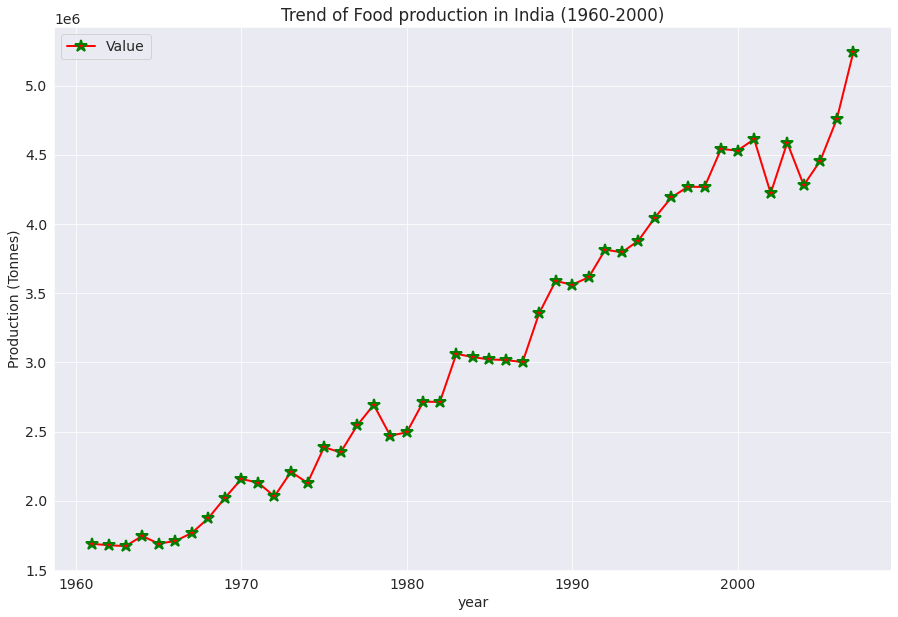

In [68]:
# First line
plt.plot(area_mean.round(decimals=2), 'r-*', linewidth=2, markersize=12, markeredgewidth=2, markeredgecolor='green')

# Title
plt.title("Trend of Food production in India (1960-2000)")

# Line labels
plt.legend(['Value'])

# Axis labels
plt.xlabel('year'); plt.ylabel('Production (Tonnes)');

## Q.2) How many types of crops and in what quantity it's contributing in food production in India over the year 1960-2000 ?

In [71]:
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20,40 )
matplotlib.rcParams['figure.facecolor'] = '#00000000'

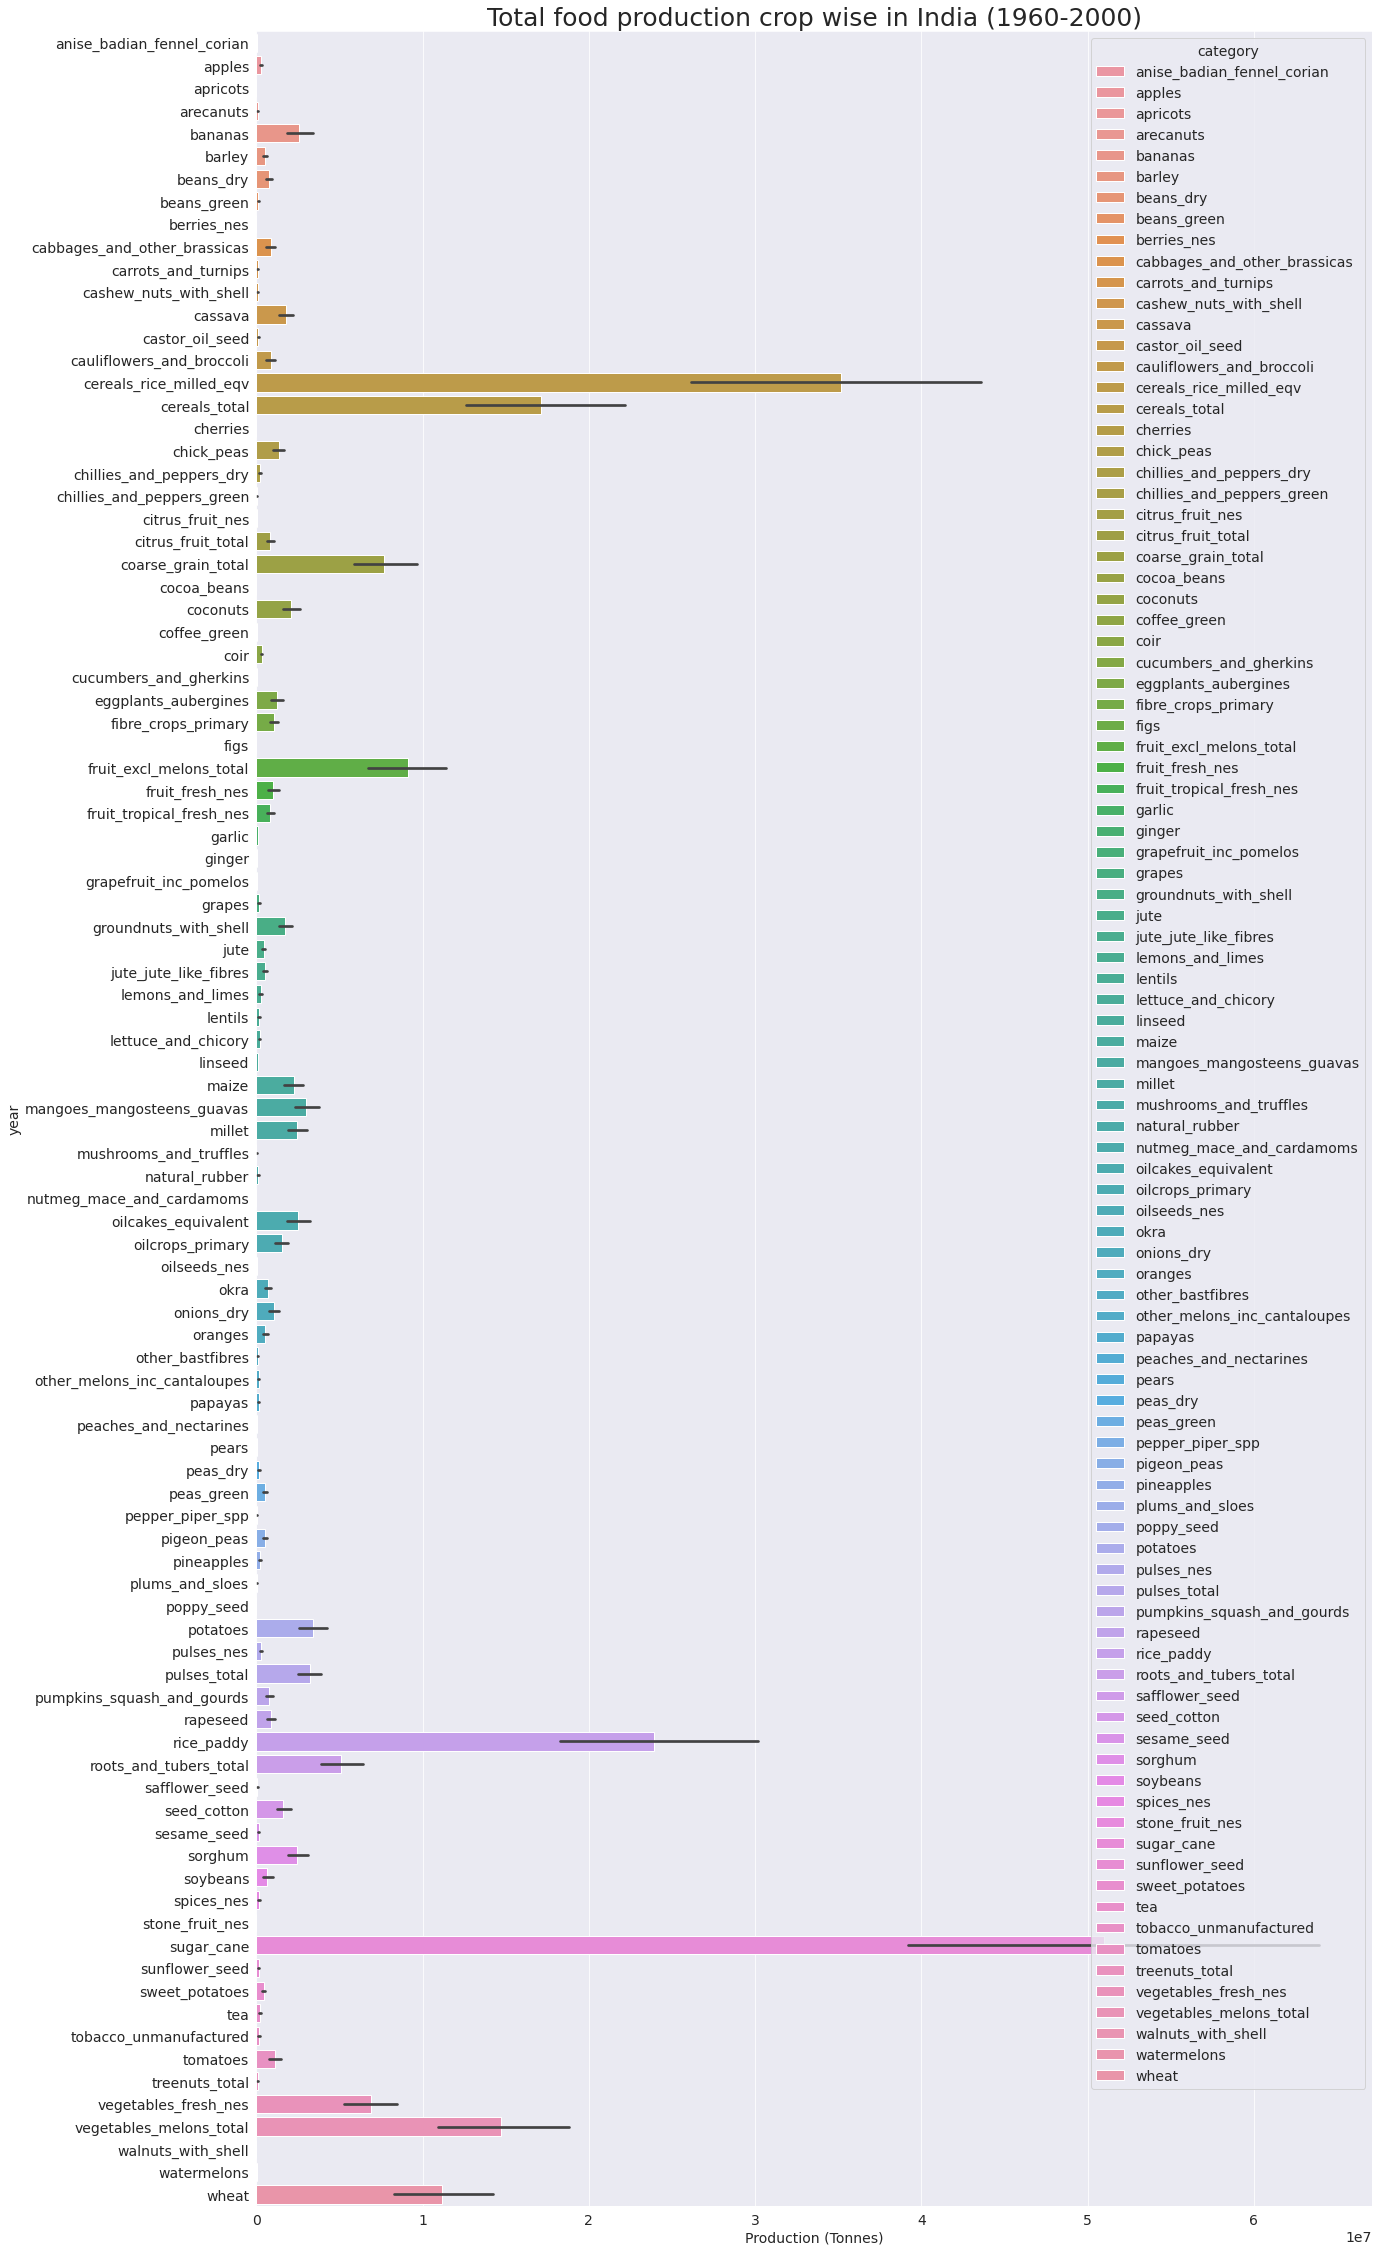

In [72]:
# Chart title
plt.title("Total food production crop wise in India (1960-2000)",size=25)
#plotting the bargraph using the barplot method from seaborn
sns.barplot(x="value", y="category", hue="category",data=India_value_category_df, dodge= False);
# Axis labels
plt.xlabel('Production (Tonnes)'); plt.ylabel('year');

## 

## Q.3) What is the trend of fertilizer production in India ?

In [18]:
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

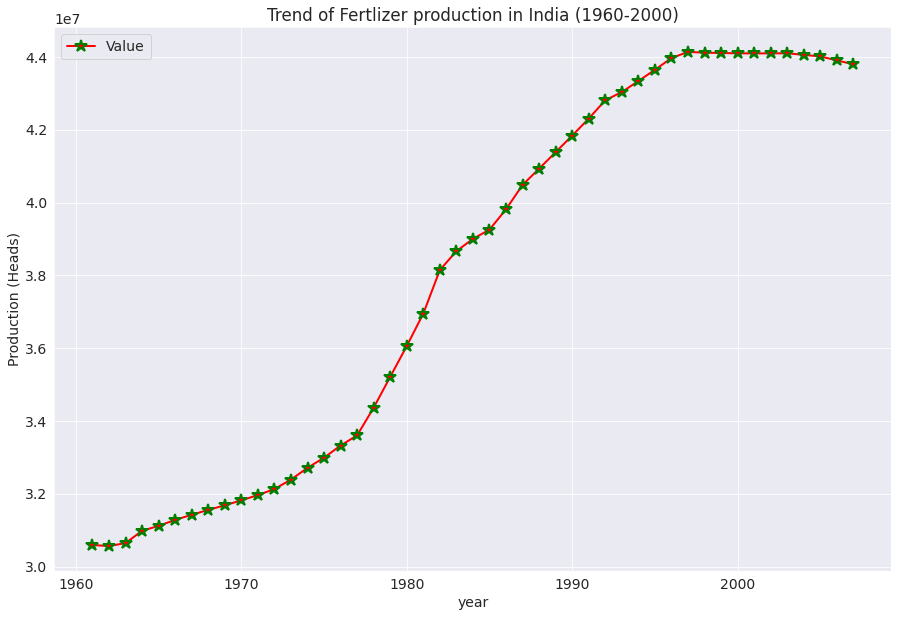

In [19]:
# First line
plt.plot(area_mean_ferti.round(decimals=2), 'r-*', linewidth=2, markersize=12, markeredgewidth=2, markeredgecolor='green')

# Title
plt.title("Trend of Fertlizer production in India (1960-2000)")

# Line labels
plt.legend(['Value'])

# Axis labels
plt.xlabel('year'); plt.ylabel('Production (Heads)');

## Q.4) What are the sources of fertilizer production ? In what amount each source contribute to the production ?

In [36]:
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15,12 )
matplotlib.rcParams['figure.facecolor'] = '#00000000'

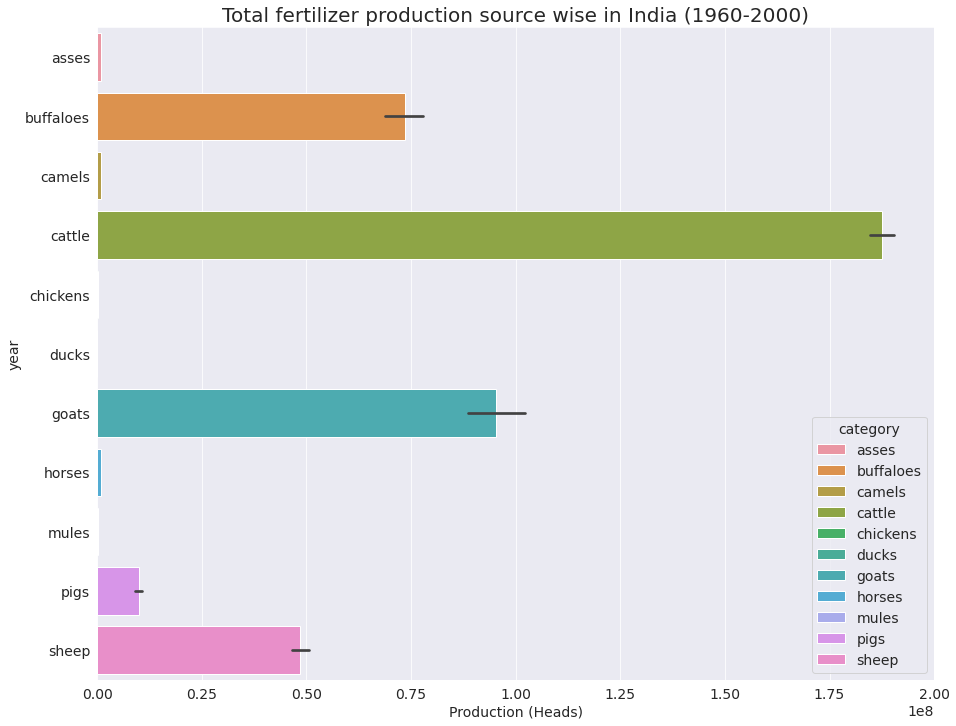

In [39]:
# Chart title
plt.title("Total fertilizer production source wise in India (1960-2000)",size=20)
#plotting the bargraph using the barplot method from seaborn
sns.barplot(x="value", y="category", hue="category",data=India_fert_catg_data_df, dodge= False);
# Axis labels
plt.xlabel('Production (Heads)'); plt.ylabel('year');

## Q.5) What is the trend of fertilizer production in world ?

In [101]:
# Configuring styles
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

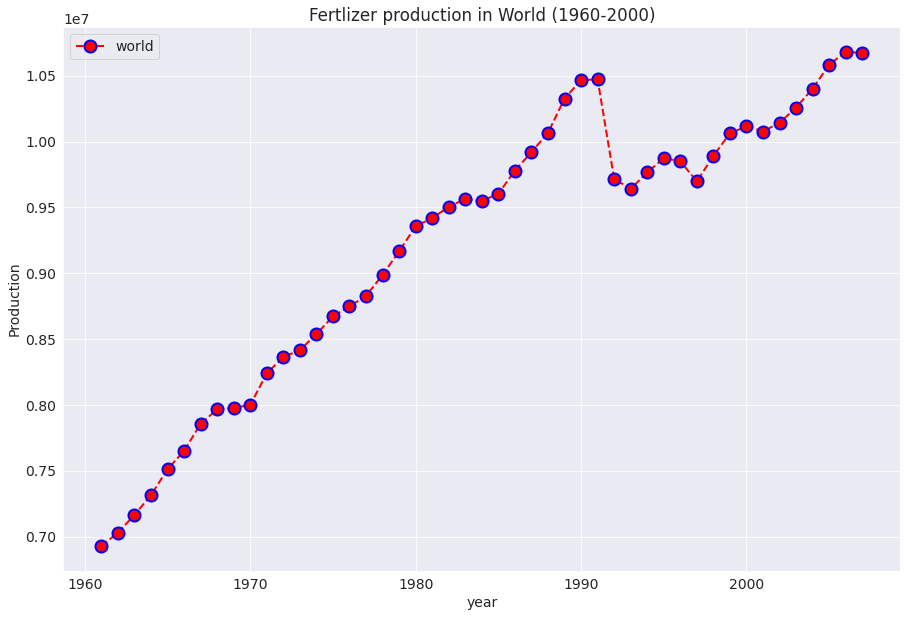

In [102]:
#First line
plt.plot(world_fertilizer_mean.round(decimals=2), 'r--o', linewidth=2, markersize=12, markeredgewidth=2, markeredgecolor='blue'); 
# Title
plt.title("Fertlizer production in World (1960-2000)")

# Line labels
plt.legend(['world'])

# Axis labels
plt.xlabel('year'); plt.ylabel('Production');

In [103]:
import jovian

In [104]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "mrzombie69232/zerotopandas-course-project-starter-satyam" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/mrzombie69232/zerotopandas-course-project-starter-satyam


'https://jovian.ml/mrzombie69232/zerotopandas-course-project-starter-satyam'

## Inferences and Conclusion


1) There is an overall increasing trend of food production for the year 1960-2000. 

2) Sugarcane is the highest production crop in India .

3) There is an exponatial growth in fertilizer production in India during the year 1960-2003. 

4) The biggest source of fertlizers is Cattle followed by goat .

5) There is an exponential growth in fertilizer production in world . 

## Conclusion 

There has been increase in food and fertlizers production in india and world over the decades . This rapid growth is somewhat related to increasing demand . The increasing demand is directly related to population growth . This also signifies the intense amount of pressure that we have on land to get more out of it . 

In [1]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## References and Future Work

1)https://www.kaggle.com/unitednations/global-food-agriculture-statistics?select=fao_data_crops_data.csv

2)https://jovian.ml/mrzombie69232/pandas-practice-assignment 

3)https://www.kaggle.com/vatsagrawal/global-agriculture-data

In [106]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
